<a href="https://colab.research.google.com/github/bodong408/Machine-Learning/blob/main/Copy_of_CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPool2D
from tensorflow.keras.models import  Model

In [13]:
mnist_data = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist_data.load_data()

(60000, 28, 28)


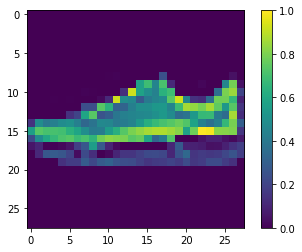

In [4]:
training_images, test_images = training_images/255.0, test_images/255.0
print(training_images.shape)

plt.figure()
plt.imshow(test_images[9])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
training_images = np.expand_dims(training_images, -1)
test_images = np.expand_dims(test_images, -1)
print(training_images.shape)

(60000, 28, 28, 1)


In [6]:
output_classes = len(set(training_labels))
output_classes

10

In [7]:
input_layer = Input(shape=training_images[0].shape)
conv1 = Conv2D(32, (3, 3), strides=2, activation='relu')(input_layer)
maxpool1 = MaxPool2D(2, 2)(conv1)
conv2 = Conv2D(64, (3, 3), strides=2, activation='relu')(maxpool1)
flat1 = Flatten()(conv2)
drop1 = Dropout(0.2)(flat1)
dense1 = Dense(512, activation='relu')(drop1)
drop2 = Dropout(0.2)(dense1)
output_layer = Dense(output_classes, activation='softmax')(drop2)
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


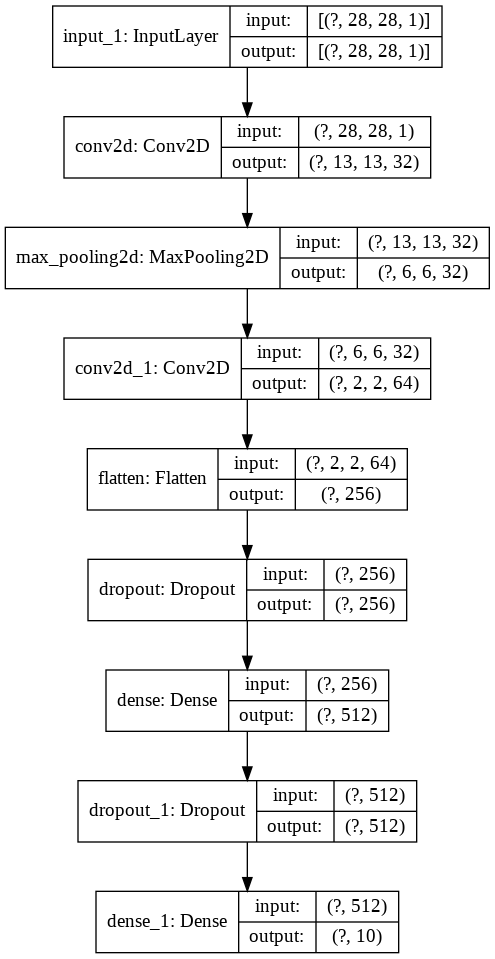

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [25]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 512)              

In [9]:
model_history = model.fit(training_images, training_labels, epochs=20, validation_data=(test_images, test_labesl), verbose=1)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6159 - accuracy: 0.7726 - val_loss: 0.4532 - val_accuracy: 0.8354
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4341 - accuracy: 0.8388 - val_loss: 0.4081 - val_accuracy: 0.8502
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3897 - accuracy: 0.8544 - val_loss: 0.3721 - val_accuracy: 0.8621
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3600 - accuracy: 0.8652 - val_loss: 0.3637 - val_accuracy: 0.8637
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3421 - accuracy: 0.8726 - val_loss: 0.3466 - val_accuracy: 0.8725
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3252 - accuracy: 0.8767 - val_loss: 0.3353 - val_accuracy: 0.8761
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3126 - accuracy: 0.8824 - val_loss: 0.3319 - val_accuracy:

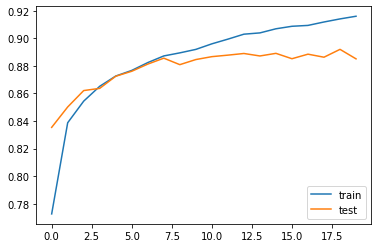

In [10]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label='val_accuracy')
plt.legend(['train', 'test'], loc='lower right')
